# Paracetaotimo
## Modelo Preditivo de Doenças por Perfil de  Usuário

## 0. Importação de Bibliotecas e Dados

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

#### Dataset fornecido pela Orizon

In [2]:
data = pd.read_csv('hackaturing.dsv', sep='|')

c:\programdata\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.columns = ['cnpj', 'prestador', 'uf', 'id_beneficiario', 'sexo', 'data_nascimento', 'id_conta', 'cid', 'crm_solicitante', 'cbos_solicitante', 'cbos_executante', 'data_entrada', 'data_saida', 'data_item', 'senha', 'tipo_guia', 'tipo_item', 'carater_atendimento', 'servico', 'descricao_despesa', 'quantidade', 'valor_item', 'valor_cobrado', 'valor_pago', 'ano_mes']

In [4]:
print('{0} linas e {1} colunas'.format(data.shape[0], data.shape[1]))
data.head()

4827171 linas e 25 colunas


,cnpj,prestador,uf,id_beneficiario,sexo,data_nascimento,id_conta,cid,crm_solicitante,cbos_solicitante,...,tipo_guia,tipo_item,carater_atendimento,servico,descricao_despesa,quantidade,valor_item,valor_cobrado,valor_pago,ano_mes
0,1deff610d3afbb1bc2403d03bb1e53ca,f3f4b65055a7f48e36488ac636ba9b5a,SP,ecdc61d19fd126067e5395f57655796f,F,1936-07-05,d2b1252a15812fca5d1d979c7acbb27d,NaN,d41d8cd98f00b204e9800998ecf8427e,NaN,...,Internacao,MEDICAMENTOS,ELETIVO,55851.0,PROBIATOP 1G LACTOPRO PO,2.0,5.9840,5.9840,5.9840,201610
1,1deff610d3afbb1bc2403d03bb1e53ca,f3f4b65055a7f48e36488ac636ba9b5a,SP,474dbcdd82fb709261c643f8aeb328f8,M,1963-03-04,17c29be731d33ede20056ed4c8b4e5ec,NaN,d41d8cd98f00b204e9800998ecf8427e,NaN,...,Internacao,MEDICAMENTOS,ELETIVO,61005.0,SORO FISIOLOGICO 100M,1.0,6.1030,0.6035,0.6035,201610
2,1deff610d3afbb1bc2403d03bb1e53ca,f3f4b65055a7f48e36488ac636ba9b5a,SP,8bfeb1e7e1eb30f828ed305da99a5879,F,1945-01-15,adefa9bd776553890d37d8ebb0462340,NaN,d41d8cd98f00b204e9800998ecf8427e,NaN,...,Internacao,MATERIAIS,ELETIVO,256200.0,HIPOCLORITO SODIO POR ML,100.0,0.8500,0.8500,0.8500,201610
3,1deff610d3afbb1bc2403d03bb1e53ca,f3f4b65055a7f48e36488ac636ba9b5a,SP,0de0de46f846e2ed0ee5e03ae17003c5,F,1963-08-22,cb8915f145f01ad43d6b28a10544566b,NaN,d41d8cd98f00b204e9800998ecf8427e,NaN,...,Internacao,MATERIAIS,ELETIVO,280022.0,ARNICA GEL 30G TB,1.0,15.5805,15.5805,15.5805,201610
4,1deff610d3afbb1bc2403d03bb1e53ca,f3f4b65055a7f48e36488ac636ba9b5a,SP,4b68daa346363196bed3e70bb20a869f,M,1957-01-18,3e870dd98a8e673e586bc3a63c77e767,NaN,d41d8cd98f00b204e9800998ecf8427e,NaN,...,Internacao,MEDICAMENTOS,ELETIVO,61005.0,SORO FISIOLOGICO 100M,1.0,6.1030,0.6035,0.6035,201610


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4827171 entries, 0 to 4827170
Data columns (total 25 columns):
cnpj                   object
prestador              object
uf                     object
id_beneficiario        object
sexo                   object
data_nascimento        object
id_conta               object
cid                    object
crm_solicitante        object
cbos_solicitante       float64
cbos_executante        float64
data_entrada           object
data_saida             object
data_item              object
senha                  object
tipo_guia              object
tipo_item              object
carater_atendimento    object
servico                float64
descricao_despesa      object
quantidade             float64
valor_item             float64
valor_cobrado          float64
valor_pago             float64
ano_mes                int64
dtypes: float64(7), int64(1), object(17)
memory usage: 920.7+ MB


Quantidade de valores nulos:

In [6]:
data.isnull().sum()

cnpj                         0
prestador                    0
uf                       22825
id_beneficiario              0
sexo                       937
data_nascimento            937
id_conta                     0
cid                    2781193
crm_solicitante         126118
cbos_solicitante       3086471
cbos_executante        4674357
data_entrada           1747426
data_saida             1925582
data_item                    0
senha                  1474913
tipo_guia                    0
tipo_item                    0
carater_atendimento          0
servico                    121
descricao_despesa       141574
quantidade              141574
valor_item                 409
valor_cobrado          4166146
valor_pago             4166146
ano_mes                      0
dtype: int64

#### Capítulos de CID fornecido pelo datasus.org.br, assim como campo de médico responsável para atender cada Capítulo

In [6]:
cid_data = pd.read_csv('cid.csv', sep=',')

In [7]:
cid_data.head(1)

,CAT,NUMCAP,DESC,MEDICO
0,A00,1,I. Algumas doenças infecciosas e parasitárias,Infectologista


## 2.Exploratory Data Analisys

### Dados do Beneficiário

Pretendemos predizer doenças comuns para perfis de Usuáro do Sistema, para isso, analisaremos as informações relativas a essa persona presentes no dataset fornecido

Há poucos dados com sexo e data_nascimento nulos (<0,5%). Essas linhas serão excluídas do Dataset

In [9]:
data[['id_beneficiario', 'sexo', 'data_nascimento']].isnull().sum()

id_beneficiario      0
sexo               937
data_nascimento    937
dtype: int64

In [8]:
data = data.dropna(subset=['uf', 'sexo', 'data_nascimento'], how='any')

In [11]:
print('{0} Beneficiários únicos no Dataset'.format(data.id_beneficiario.drop_duplicates().shape[0]))

245847 Beneficiários únicos no Dataset


#### Distribuição por Sexo:
Podemos observar que a base de dados apresenta uma distribuição próxima de homens e mulheres, com uma pequena predominância de mulheres

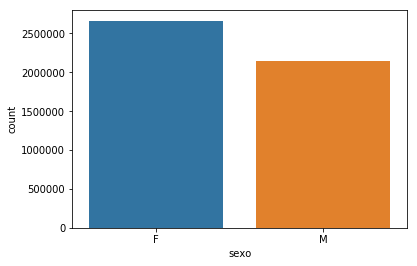

In [12]:
sns.countplot('sexo',data=data)

#### Distribuição por Data de Nascimento:
Para facilitar a análise da variável Data de Nascimento, será considerada a idade dos beneficiários no ano em que o registro foi criado.
Observa-se uma predominância de beneficiários adultos e idosos, com um pequeno pico de infantes.

In [9]:
data['ano_nascimento'] = data.data_nascimento.apply(lambda dt : dt[:4])

In [10]:
data['idade'] = data.apply(lambda row: int(str(row.ano_mes)[:4]) - int(row.ano_nascimento),axis=1)

Distribuição por Idade:


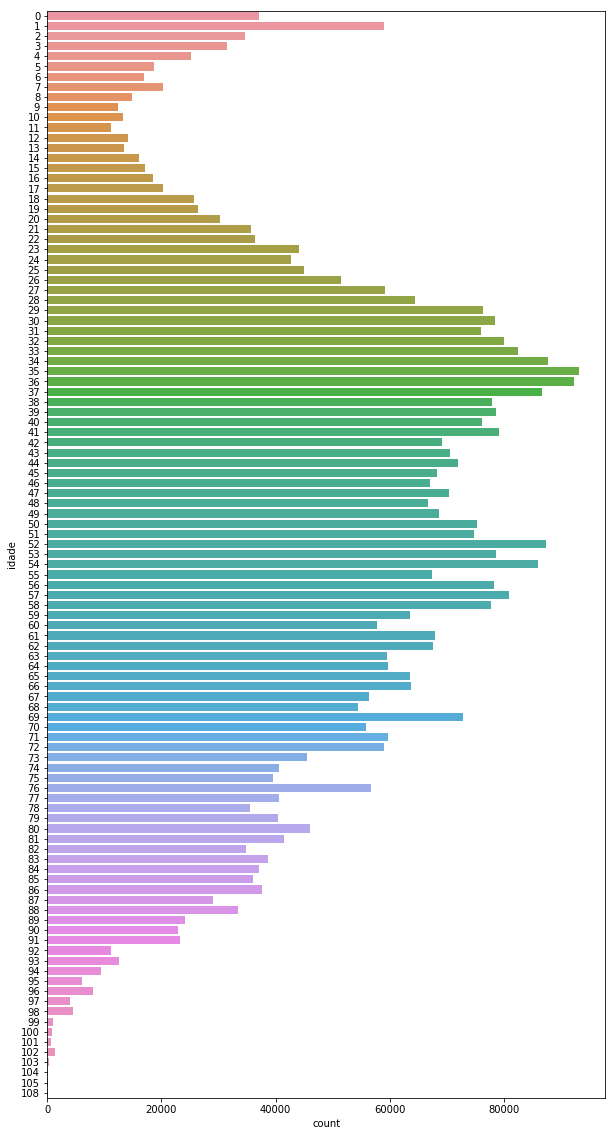

In [15]:
print('Distribuição por Idade:')
f,ax=plt.subplots(1,1,figsize=(10,20))
sns.countplot(y='idade',data=data, ax=ax)

Com o intuito de reduzir a complexidade da variável, optou-se por utilizar faixas etárias, separando crianças, adolescentes, jovens adultos, adultos de meia-idade, idosos e pessoas acima de 75 anos.

In [11]:
data['faixa_etaria'] = pd.cut(data['idade'], [-1, 13, 21, 40, 60, 75, 110], labels=['0-13', '13-21', '21-40', '40-60', '60-75', '75+'])
data['faixa_etaria_int'] = pd.cut(data['idade'], [-1, 13, 21, 40, 60, 75, 110], labels=[0, 1, 2, 3, 4, 5])

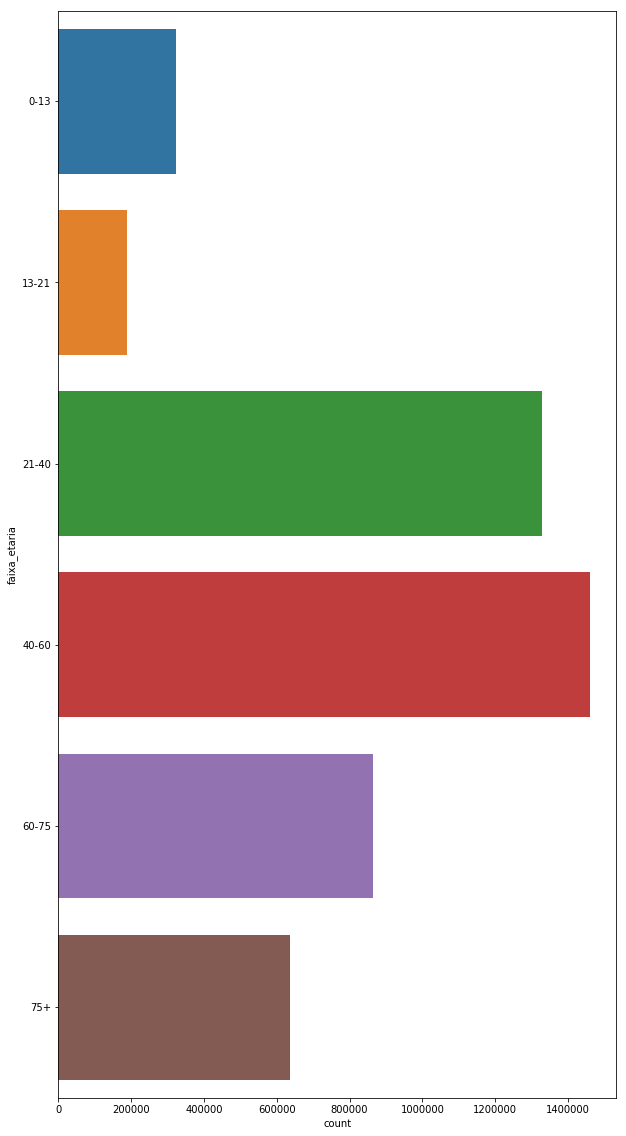

In [17]:
f,ax=plt.subplots(1,1,figsize=(10,20))
sns.countplot(y='faixa_etaria',data=data, ax=ax)

#### Perfil de Idade x Sexo
No gráfico abaixo, há um comparativo entre idade e sexo dos beneficiários. A distribuição de idades entre Homens e Mulheres é no geral semelhante, exceto na faixa de 30 a 40 anos, onde existe um número significativamente maior de mulheres.

c:\programdata\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


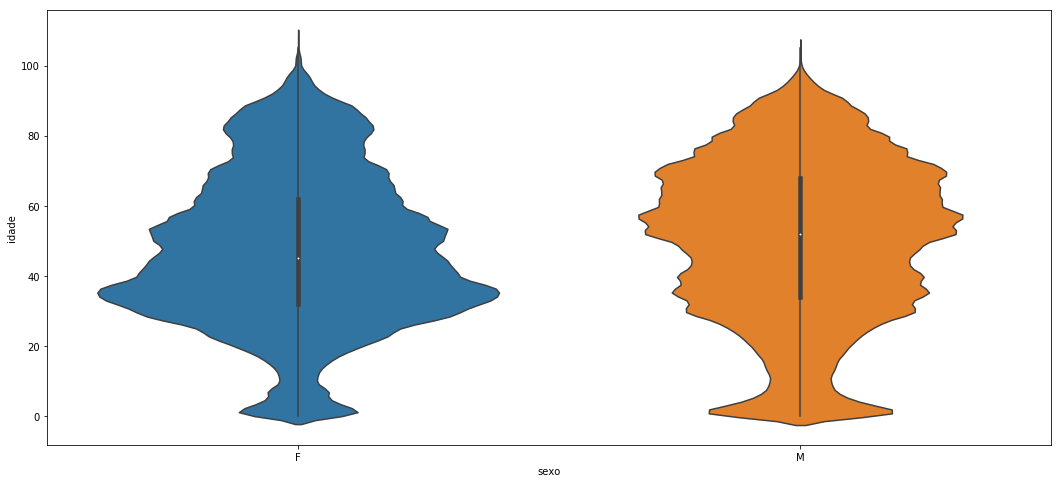

In [18]:
f,ax=plt.subplots(1,1,figsize=(18,8))
sns.violinplot(x='sexo', y='idade', data=data, ax=ax)

### Dados da Guia
As informações de Doenças está presente na dimensão da Guia, que corresponde a um conjunto de gastos de uma determinada Internação, Counsulta, Honorário ou SADT (Serviço de Apoio Diagnóstico Terapêutico).

#### Tipo de Guia
Como supracitado, as guias são separadas em quatro tipos, além de um qualificador de caráter do atendimento: elegível ou urgente. Além disso, cada custo dentro de uma Guia é caracterizado pelo tipo_item, exemplo: Procedimento, Medicamento, etc.

In [19]:
pd.crosstab([data.tipo_guia],[data.carater_atendimento,data.tipo_item],margins=True).style.background_gradient(cmap='Pastel1')

Além de distribuições distintas, as guias se diferem também pelo seu custo médio.
O custo médio de Internações é significativamente superior ao de Consultas e SADTs, apesar de ser altamente variável.

In [23]:
data.groupby(['id_conta','tipo_guia'], as_index=False)['valor_item'].agg({'valor':'sum'}).groupby(['tipo_guia'], as_index=False)['valor'].agg({'valor':['mean','std']})
#data.groupby(['id_conta','tipo_guia'], as_index=False)['valor_item'].agg({'valor':'sum'}).describe()
#doencas.groupby(['NUMCAP'], as_index=False)['valor_item'].agg({'porcentagem':'sum'}).apply(lambda x: 100*x / x.sum())

c:\programdata\anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


tipo_guia        valor             
                      mean          std
0    Consulta    70.809329    34.910951
1   Honorario  1146.855569  1455.342587
2  Internacao  1320.939191  4454.286431
3        SADT   188.272998   385.292648

#### CID
O campo que identifica a mazela é o CID (Código Internacional de Doenças). Em Consultas, Honorários e SADTs, esse valor é raramente ou nunca preenchido, e en Internações, preenchido por volta de 2 terços das vezes, o que representa um volume razoável.

In [12]:
data['cid_valido'] = data.cid == data.cid;

In [13]:
pd.crosstab(data.tipo_guia, data.cid_valido, margins=True)

cid_valido,False,True,All
tipo_guia,,,
Consulta,136147,221,136368
Honorario,23848,0,23848
Internacao,865966,2032729,2898695
SADT,1734180,10318,1744498
All,2760141,2043268,4803409


O código presente no Dataset se refere a um nível bastante específico. Para resuzir a complexidade do modelo, foi adicionada a informação de Capítulo do CID, que é um agrupamento de alto nível (22 valores), disponíveis em datasus.org.br.

In [14]:
data['cid_cat'] = data.cid.apply(lambda c : c[:3] if c == c else c)

In [15]:
data = data.merge(right=cid_data, left_on='cid_cat', right_on='CAT', how='left')

In [25]:
cid_data[['NUMCAP', 'DESC', 'MEDICO']].drop_duplicates()

,NUMCAP,DESC,MEDICO
0,1,I. Algumas doenças infecciosas e parasitárias,Infectologista
200,2,II. Neoplasias (tumores),Oncologista/Clínico
350,3,III. Doenças sangue órgãos hemat e transt imun...,Hematologista
400,4,IV. Doenças endócrinas nutricionais e metaból...,Endocrinologista
500,5,V. Transtornos mentais e comportamentais,Psiquiatra
600,6,VI. Doenças do sistema nervoso,Neurologista
700,7,VII. Doenças do olho e anexos,Oftalmologista
760,8,VIII.Doenças do ouvido e da apófise mastóide,Otorrinolaringologista
800,9,IX. Doenças do aparelho circulatório,Cardiologista
900,10,X. Doenças do aparelho respiratório,Pneumologista


In [31]:
doencas = data[data.tipo_guia=='Internacao'].groupby(['id_conta','NUMCAP'], as_index=False)['valor_item'].sum()

No conjunto de gráficos seguinte, são relacionados:
- Frequência Interações por Capítulos CID
- Custo Total da Internação por Capítulo CID
- Custo Médio de Internação por Capítulo CID

É notável que o custo médio das internações é próximo, de forma que as internações mais custosas para a Operadora de Seguros são também as mais frequentes.
Há uma exceção para capítulo 4, que apesar de não ser tão frequente, apresenta um custo médio muito superior à média dos demais, figurando portanto, entre os maiores custos totais.

c:\programdata\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Gasto Médio por Capítulo CID')

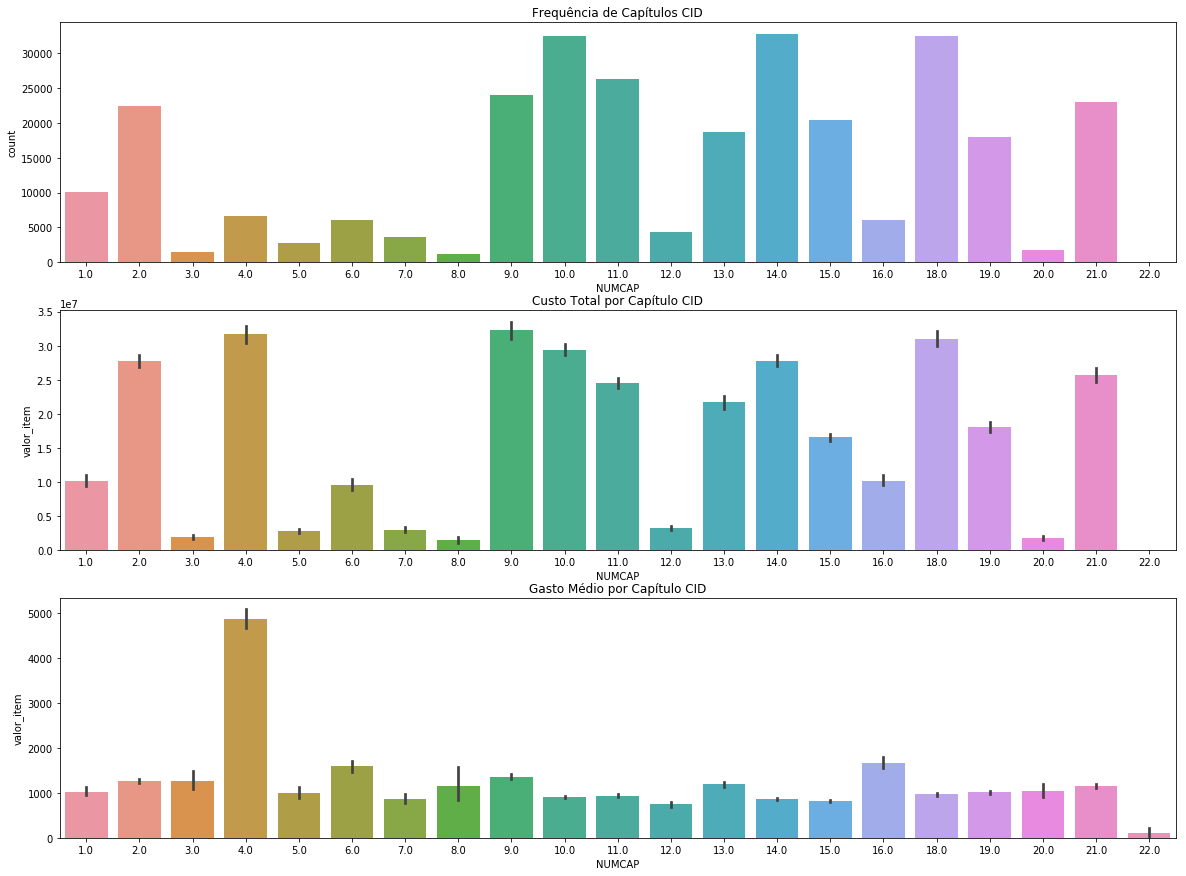

In [37]:
f,ax=plt.subplots(3,1,figsize=(20,15))
sns.countplot('NUMCAP',data=data[['id_conta','NUMCAP']].drop_duplicates(), ax=ax[0])
ax[0].set_title('Frequência de Capítulos CID')
sns.barplot(x="NUMCAP", y="valor_item", data=doencas, ax=ax[1], estimator=sum)
ax[1].set_title('Custo Total por Capítulo CID')
sns.barplot(x="NUMCAP", y="valor_item", data=doencas, ax=ax[2])
ax[2].set_title('Gasto Médio por Capítulo CID')

Participação do Custo Total dos Capítulos no Total:

In [47]:
doencas.groupby(['NUMCAP'], as_index=False)['valor_item'].agg({'porcentagem':'sum'}).apply(lambda x: 100*x / x.sum())

,NUMCAP,porcentagem
0,0.423729,3.070716
1,0.847458,8.409554
2,1.271186,0.578853
3,1.694915,9.588494
4,2.118644,0.840853
5,2.542373,2.883965
6,2.966102,0.904517
7,3.389831,0.426950
8,3.813559,9.766028
9,4.237288,8.890784


Após essas informações, escolhemos focar na previsão dos seguintes Capítulos de Doenças: 2, 4, 9, 10, 11, 13, 14, 15.
Esses Capítulos compreendem ~65% dos gastos totais de Internações. 
Os Capítulos 18, 19 e 22 também são significativos, mas consideramos que não são facilmente preveníveis.

### Hipótese
Para atrelar um perfil de usuário a uma doença (no caso, estão disponíveis idade e sexo do indivíduo), espera-se que haja uma distribuição perceptível entre casos de internação para usuários de diferentes sexos e faixas etárias.

In [27]:
hip = data.dropna(axis=0, subset=['NUMCAP'])

In [28]:
pd.crosstab(data.NUMCAP,[hip.faixa_etaria, hip.sexo],margins=True).style.background_gradient(cmap='coolwarm')

Na Tabela, pode-se notar que há capítulos de mazelas que se manifestam com maior frequência em pessoas de determinado sexo e faixa etária.

## 3. Treinamento e Predição

In [16]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn import preprocessing

c:\programdata\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [17]:
xxx = data.dropna(axis=0, subset=['NUMCAP'])

In [18]:
xxx = xxx[xxx.tipo_guia=='Internacao']

In [19]:
xxx = xxx[xxx.NUMCAP.isin([2, 4, 9, 10, 11, 13, 14, 15])]

In [20]:
xxx.sexo = xxx.sexo.apply(lambda sexo : 1 if sexo == 'F' else 0)

In [21]:
train,test=train_test_split(xxx,test_size=0.3,random_state=0,stratify=xxx['NUMCAP'])
train_X=train[['sexo', 'faixa_etaria_int']]
train_Y=train[['NUMCAP']]
test_X=test[['sexo', 'faixa_etaria_int']]
test_Y=test[['NUMCAP']]
X=xxx[['sexo', 'faixa_etaria_int']]
Y=xxx['NUMCAP']

In [22]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Random Forest']
models=[RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Random Forest,0.291115,0.008757
